#### **Q4.** kNN classifier for multi-class classification problem

In [1]:
import cv2
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from utils import *


In [2]:
folders = ['bird', 'cat','airplane','automobile']
train_path_list = []
test_path_list = []
train_dir = 'C:/Users/zlai/Documents/repo/HomeworkTex/ML/hw/homework 1/data/train/'
test_dir = 'C:/Users/zlai/Documents/repo/HomeworkTex/ML/hw/homework 1/data/test/'
for folder in folders:
    l_train = train_dir + folder 
    l_test = test_dir + folder
    train_path_list.append(l_train)
    test_path_list.append(l_test)

In [3]:
x1_train, y1_train = load_data(train_path_list, feature='raw')
x1_test, y1_test = load_data(test_path_list, feature='raw')

x2_train, y2_train = load_data(train_path_list, feature=None)
x2_test, y2_test = load_data(test_path_list, feature=None)

In [4]:
x1_train = x1_train/255
x1_test = x1_test/255

In [5]:
print (x1_train.shape)
print (x2_train.shape)

(80, 3072)
(80, 512)


In [6]:
def euclid_dist(x1, x2):
    """
    Euclidean distance between two numpy arrays.
    """
    return np.linalg.norm(x1 - x2)

In [7]:
def get_neighbors(x_train, y_train, x, k):
    """
    Returns the k nearest neighbors.
    Input(s):
    - x_train, y_train: the training samples and its labels
    - x: the data point whose neighbors we are interested in
    - k: number of neighbors to return   
    """
    distances = []
    for i in range(x_train.shape[0]):
        dist = euclid_dist(x, x_train[i])
        distances.append((x_train[i], dist, y_train[i]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

Function `vote` to decide which is the nearest neighbour

In [8]:
from collections import Counter
def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    return class_counter.most_common(1)[0][0]

In [9]:
def knn_classfier(x_train, y_train, x_test, y_test, k):
    """
    Returns the k nearest neighbors.
    Input(s):
    - x_train, y_train: the training set and its labels
    - x_test, y_test: the testing set and its labels
    - k: number of neighbors to return   
    """
    y_predict = np.zeros(y_test.shape)
    for i in np.arange(x_test.shape[0]):
        neighbors = get_neighbors(x_train, y_train, x_test[i], k)
        nearest = vote(neighbors)
        y_predict[i] = nearest
        
    return y_predict

In [10]:
def knn_accuracy(y_test, y_predict):
    """
    Returns the accuracy of the predicted classes.
    Input(s):
    - y_test: the true class 
    - y_label: the predicted class
    """
    ind = (y_test == y_predict)
    return np.average(ind)

In [11]:
def knn(x_train, y_train, x_test, y_test, max_k):
    """
    - x_train, y_train: the training set and its labels
    - x_test, y_test: the testing set and its labels
    - max_k: the maximum k to consider where k is the number of neighbors to return   
    """
    accuracy = []
    for i in np.arange(1,max_k+1):
        y_predict = knn_classfier(x_train, y_train, x_test, y_test, i)
        acc = knn_accuracy(y_test, y_predict)
        accuracy.append(acc)
    return accuracy

In [12]:
acc1_train = knn(x1_train, y1_train, x1_train, y1_train, 30)
acc2_train = knn(x2_train, y2_train, x2_train, y2_train, 30)

acc1_test = knn(x1_train, y1_train, x1_test, y1_test, 30)
acc2_test = knn(x2_train, y2_train, x2_test, y2_test, 30)

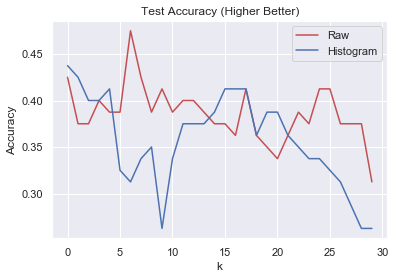

In [13]:
plt.plot(acc1_test, color='r')
plt.plot(acc2_test, color='b')
plt.title('Test Accuracy (Higher Better)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(['Raw', 'Histogram'], loc='upper right')

In [14]:
print (np.argmax(acc1_test))
print (np.argmax(acc2_test))

6
0


From my implementation of k nearest neighbors, we see that we obtain the highest accuracy of 47.5% for using the raw pixel value features with `k=6` and the smallest non-zero value of `k=4` if we use the histogram features with approximate accuracy 42.5%.